In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image

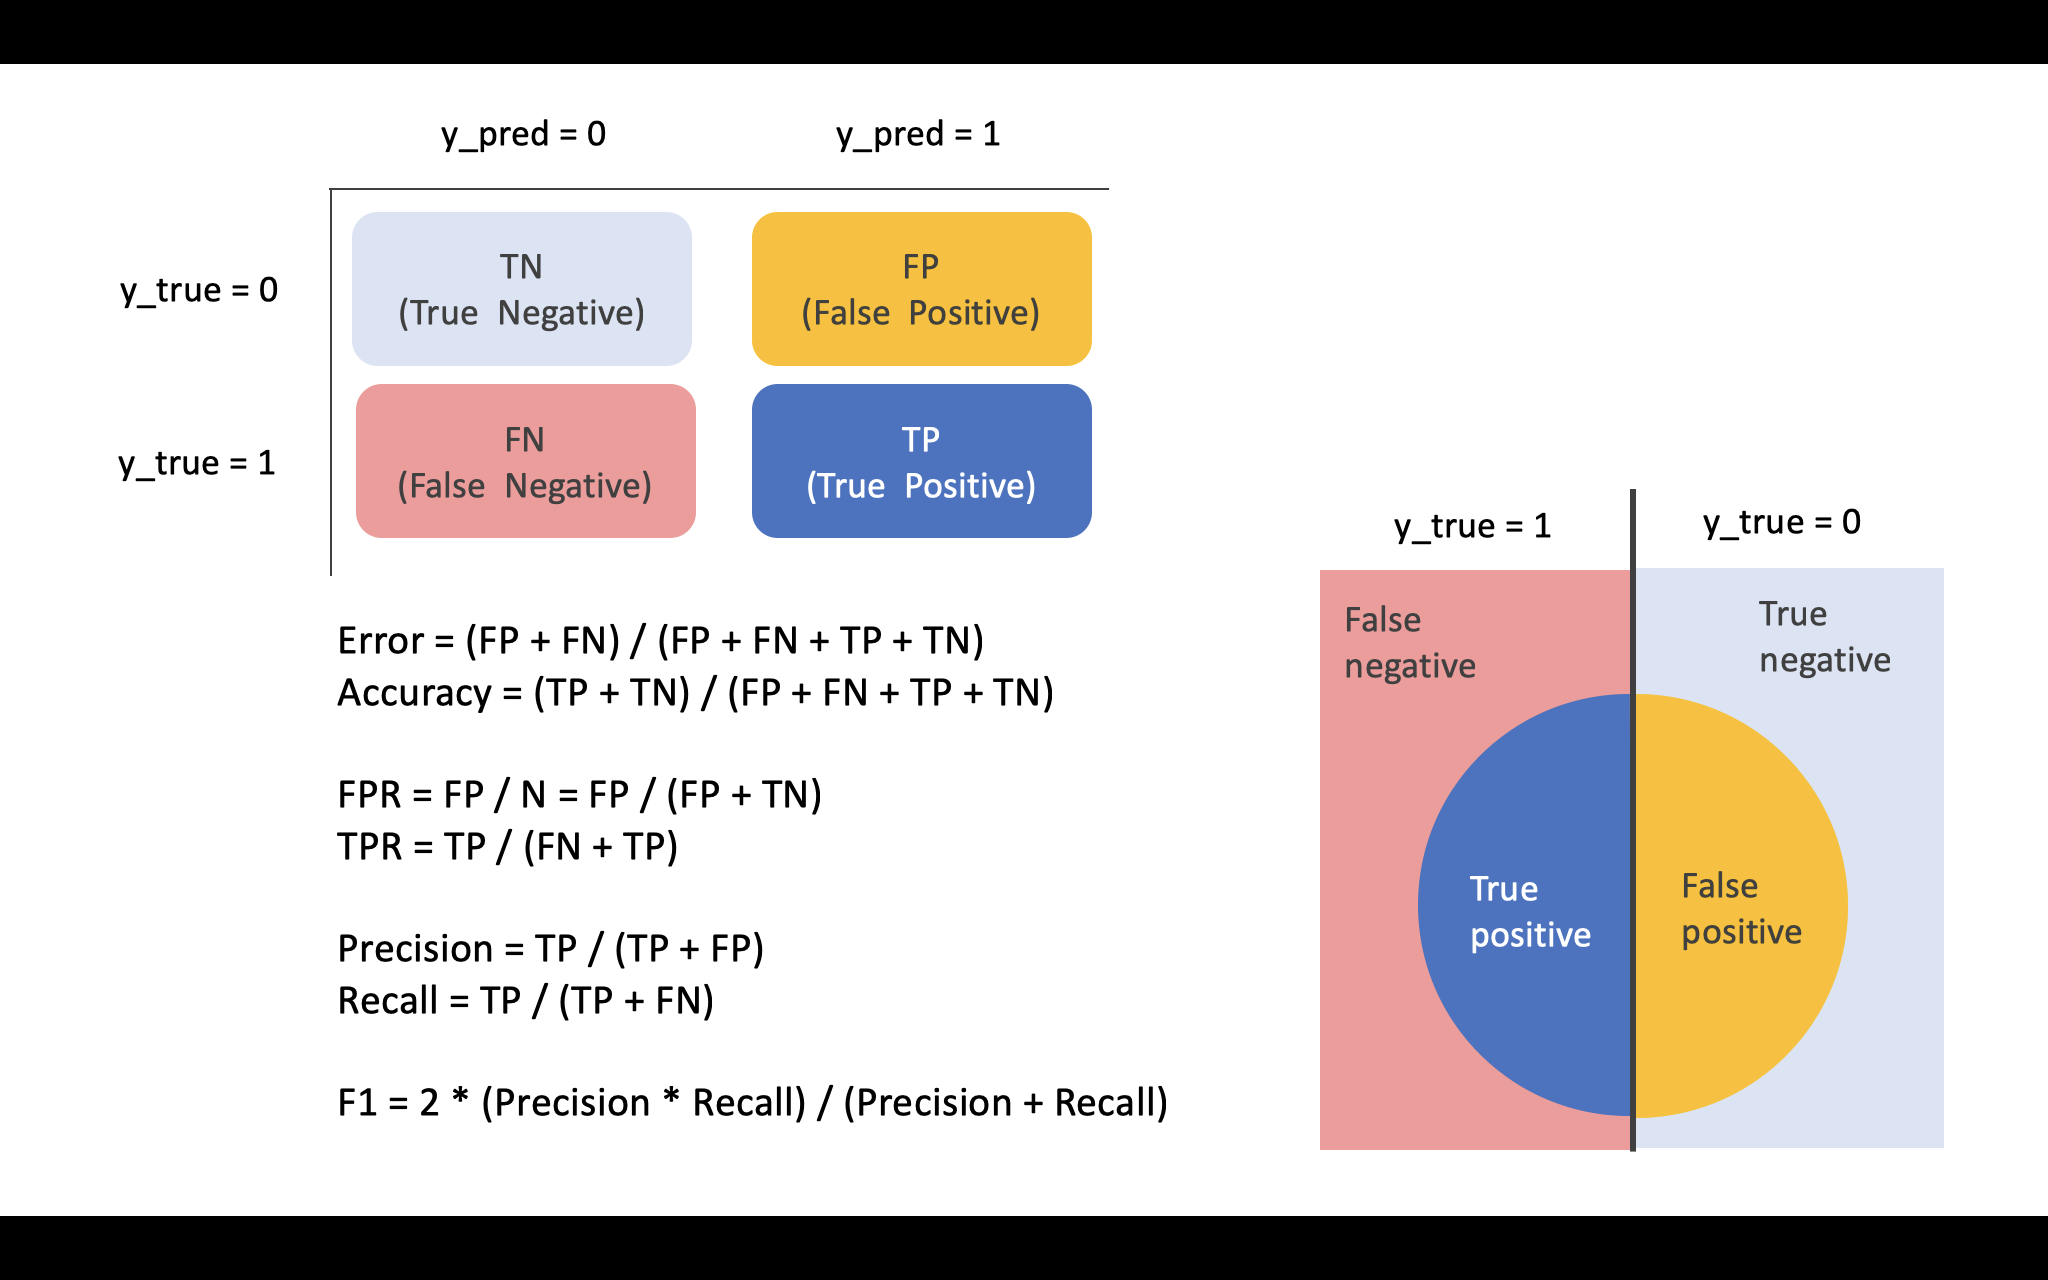

In [2]:
Image(filename='./charts/precision_recall_tradeoff_1.png', width=600)

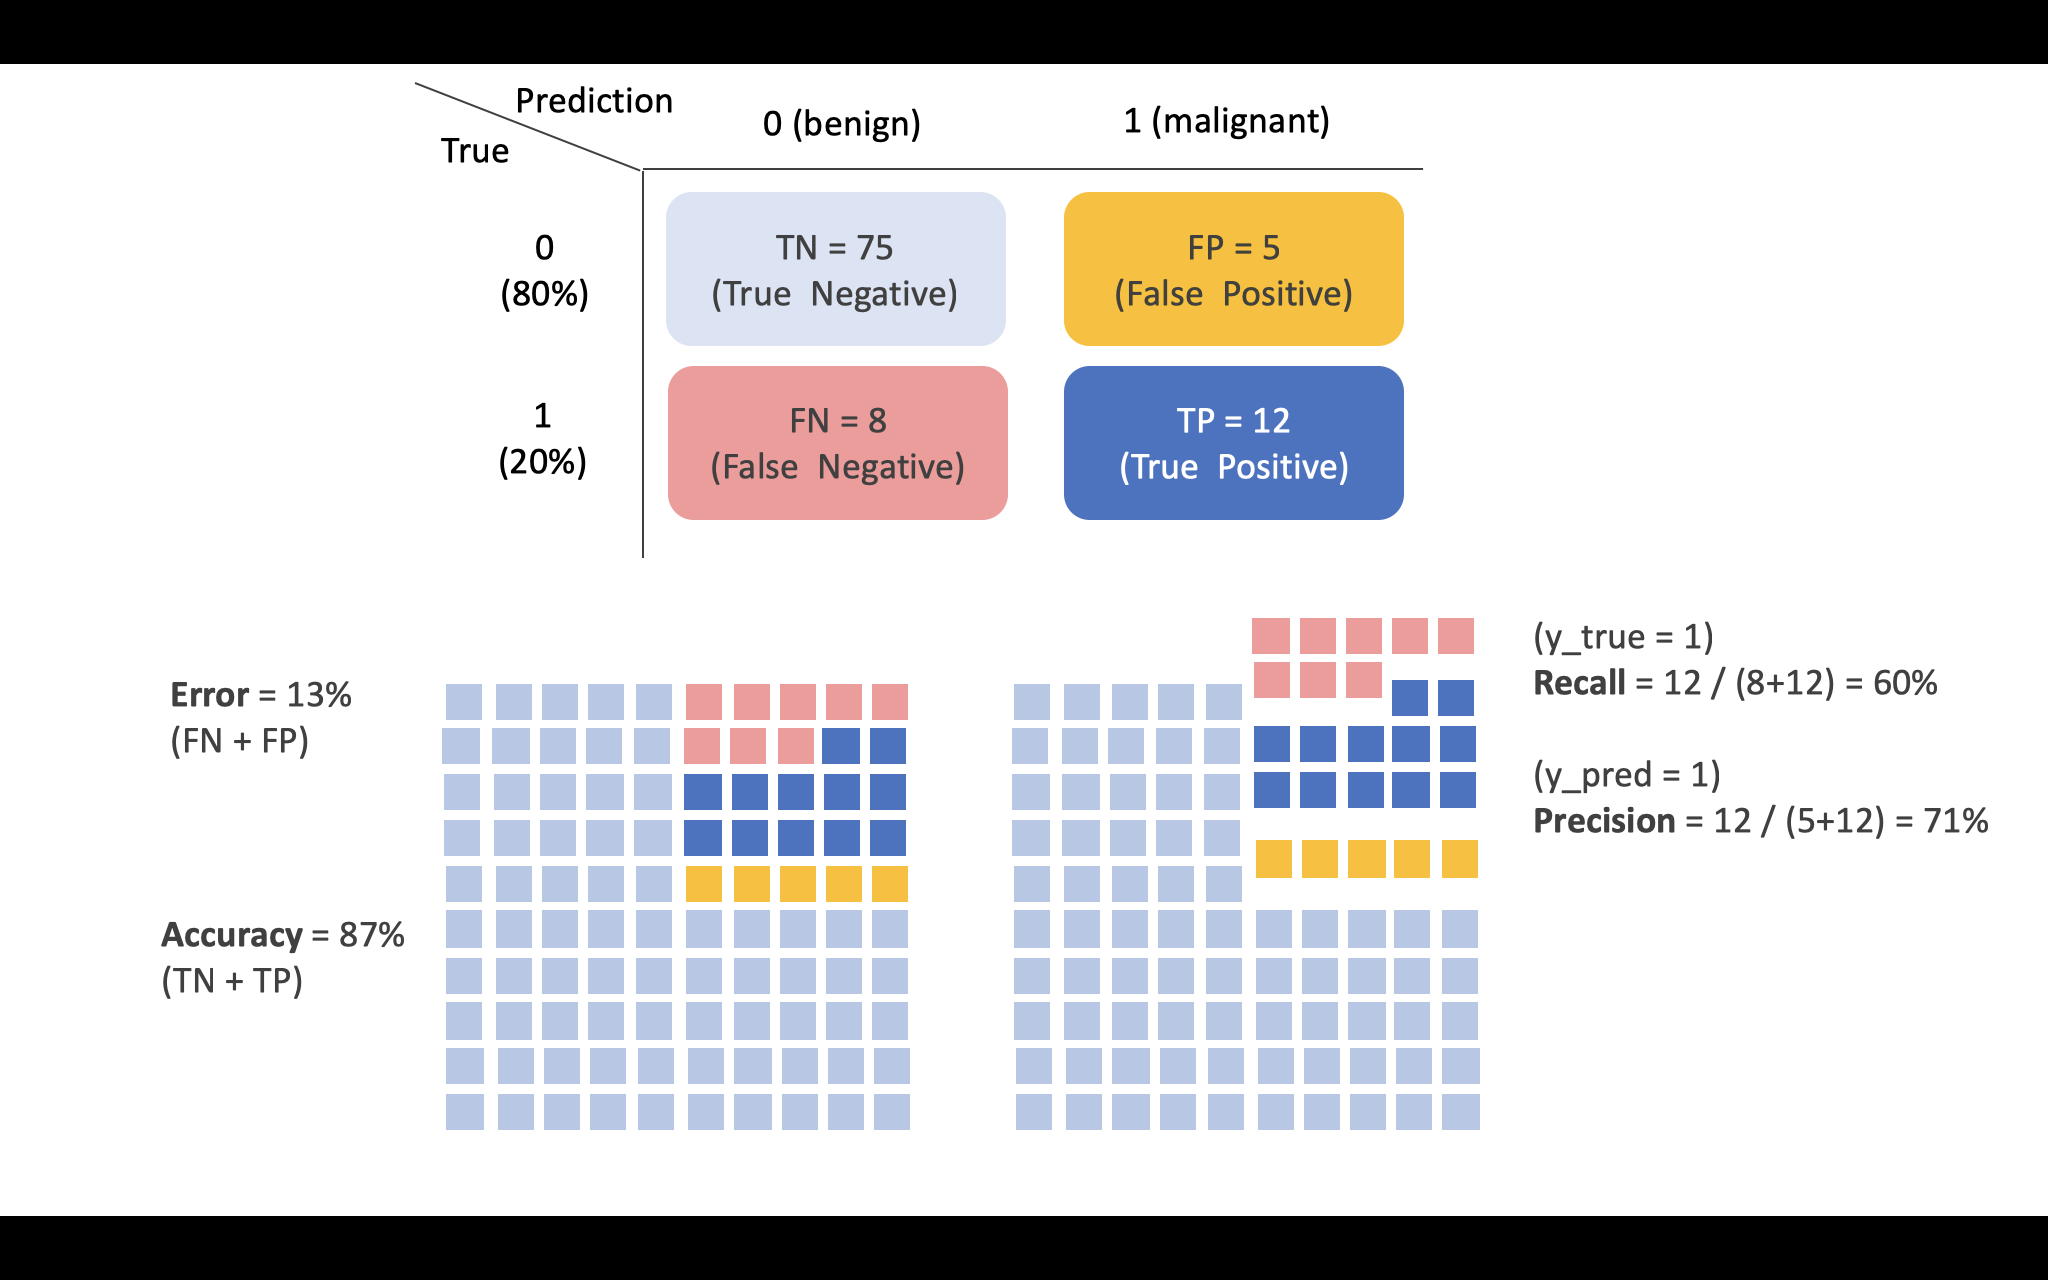

In [3]:
Image(filename='./charts/precision_recall_tradeoff_2.png', width=600)

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target_names)

X = cancer.data
y = pd.Series(cancer.target)
y = y.map({0: 1, 1: 0})  # make pos_label=1
X = np.vstack([X[y==0], X[y==1][:80, :]])  # 357 "benign" + 80 "malignant"
y = np.hstack([y[y==0], y[y==1][:80]])

(569, 30) ['malignant' 'benign']


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
#from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

"""
estimator = make_pipeline(
                        StandardScaler(),
                        SVC(random_state=1))
"""

estimator = Pipeline([
    ('sc', StandardScaler()),
    ('svc', SVC(random_state=1))
])

param_range = [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3]

param_grid = [
    {'svc__C': param_range,
    'svc__kernel': ['linear']},
    {'svc__C': param_range,
    'svc__gamma': param_range,
    'svc__kernel': ['rbf']},
]

gs = GridSearchCV(
            estimator=estimator,
            param_grid=param_grid,
            scoring='accuracy',
            cv=10,
            n_jobs=-1,
            iid=False,
)

gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(f'Test accuracy={clf.score(X_test, y_test):.2f}')

0.9785984848484848
{'svc__C': 0.1, 'svc__kernel': 'linear'}
Test accuracy=0.99


(0.0, 1.0, 0.0, 1.0)

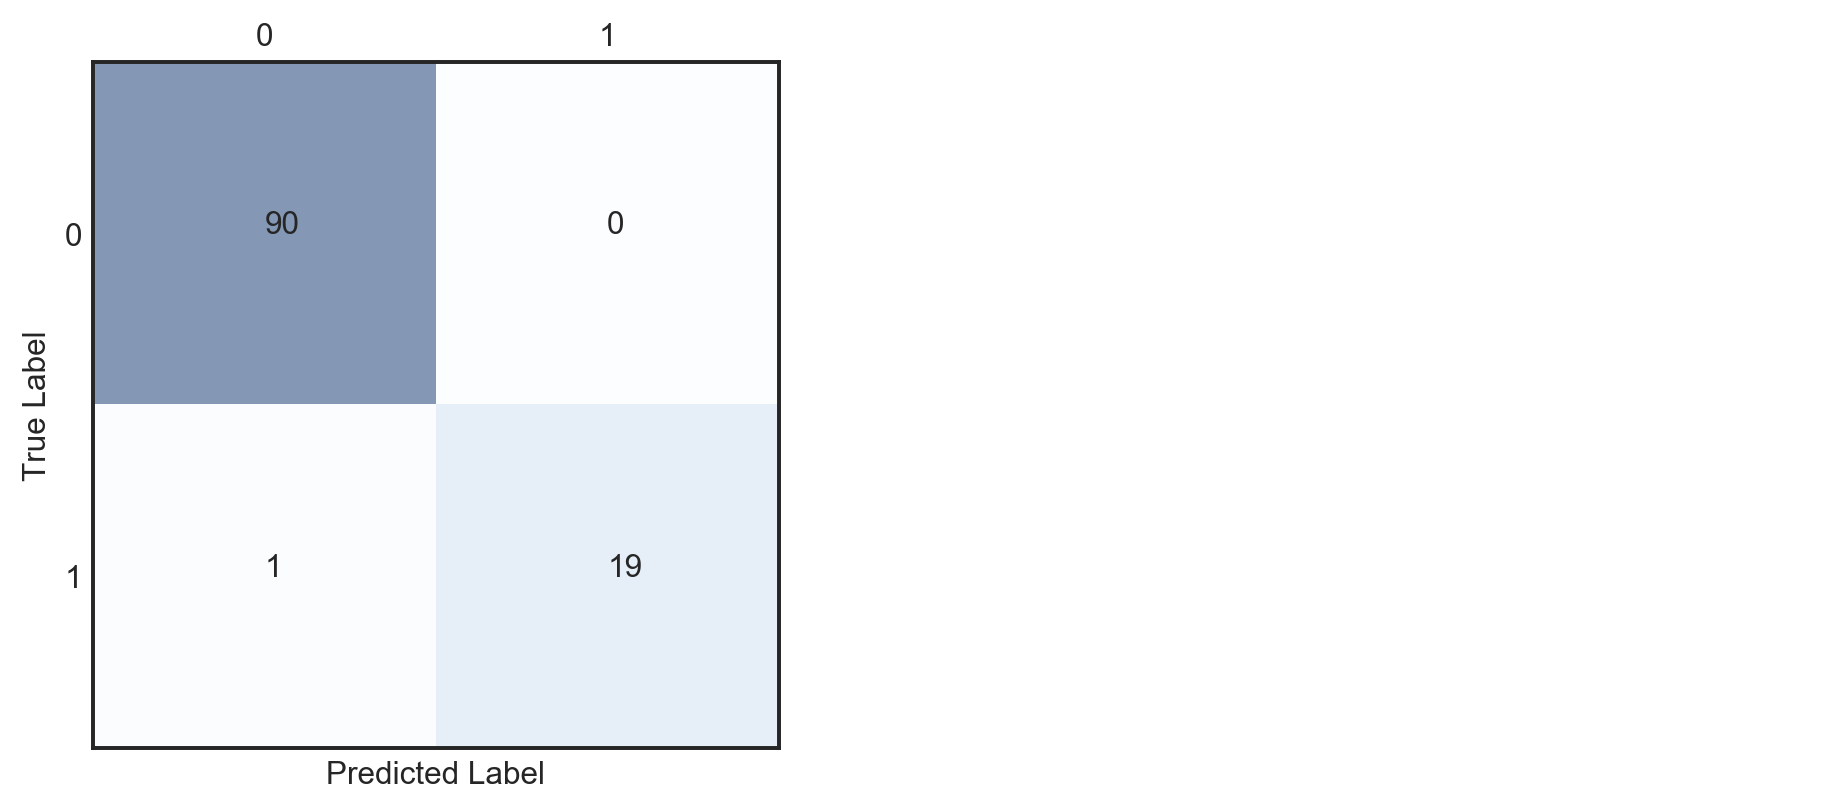

In [7]:
from sklearn.metrics import confusion_matrix

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
for i in np.unique(y):
    for j in np.unique(y):
        axes[0].text(x=j, y=i, s=confmat[i][j])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[1].axis('off')

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f'Precision = {precision_score(y_true=y_test, y_pred=y_pred):.3f}')
print(f'Recall = {recall_score(y_true=y_test, y_pred=y_pred):.3f}')
print(f'F1 = {f1_score(y_true=y_test, y_pred=y_pred):.3f}')

Precision = 1.000
Recall = 0.950
F1 = 0.974
